In [15]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [16]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [17]:
ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        labels.append(int(part[2]))
        paths.append(ravdess + i + '/' + f)
        

In [ ]:
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])
# ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# # changing integers to actual emotions.
# ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
#                              8:'surprise'},
#                             inplace=True)
# print(ravdess_df.head())
# print("______________________________________________")
# print(ravdess_df.tail())
# print("_______________________________________________")
# print(ravdess_df.Emotions.value_counts())

In [19]:
df = pd.DataFrame()
df['label'] = labels
df['speech'] = paths

df.head()

,label,speech
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [20]:
df.tail()

,label,speech
7035,6,/kaggle/input/ravdess-emotional-speech-audio/a...
7036,5,/kaggle/input/ravdess-emotional-speech-audio/a...
7037,4,/kaggle/input/ravdess-emotional-speech-audio/a...
7038,7,/kaggle/input/ravdess-emotional-speech-audio/a...
7039,5,/kaggle/input/ravdess-emotional-speech-audio/a...


In [22]:
df.label.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

/tmp/ipykernel_34/2042396250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


In [23]:
df['label'].value_counts()

label
neutral     1088
fear         992
angry        992
disgust      992
sad          992
happy        992
ps           800
surprise     192
Name: count, dtype: int64

In [28]:
df = df.drop(df[df['label'] == 'fear'].index)
df = df.drop(df[df['label'] == 'ps'].index)
df = df.drop(df[df['label'] == 'disgust'].index)
df = df.drop(df[df['label'] == 'surprise'].index)

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.head()

,label,speech
0,angry,/kaggle/input/toronto-emotional-speech-set-tes...
1,angry,/kaggle/input/toronto-emotional-speech-set-tes...
2,angry,/kaggle/input/toronto-emotional-speech-set-tes...
3,angry,/kaggle/input/toronto-emotional-speech-set-tes...
4,angry,/kaggle/input/toronto-emotional-speech-set-tes...


In [31]:
df['label'].value_counts()

label
neutral    1088
angry       992
sad         992
happy       992
Name: count, dtype: int64

In [32]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

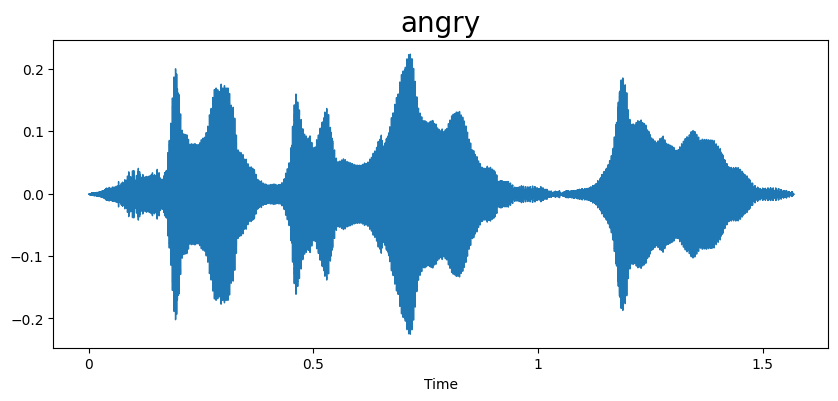

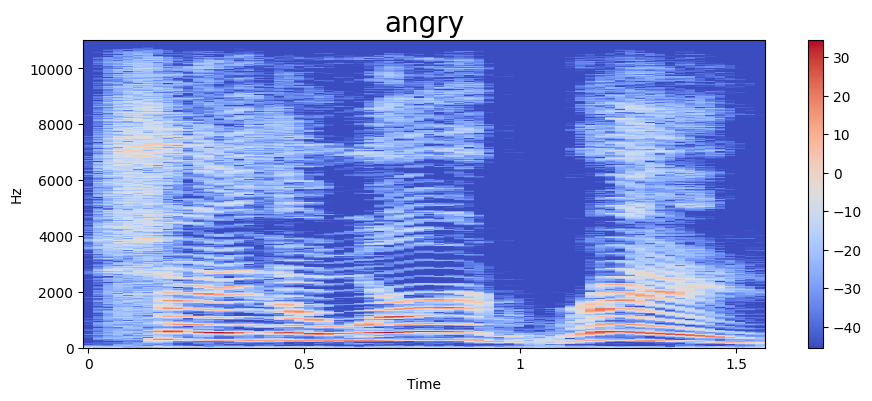

In [33]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

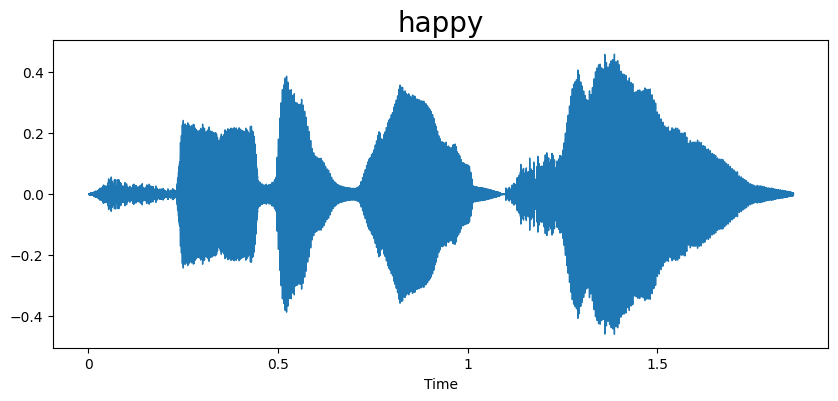

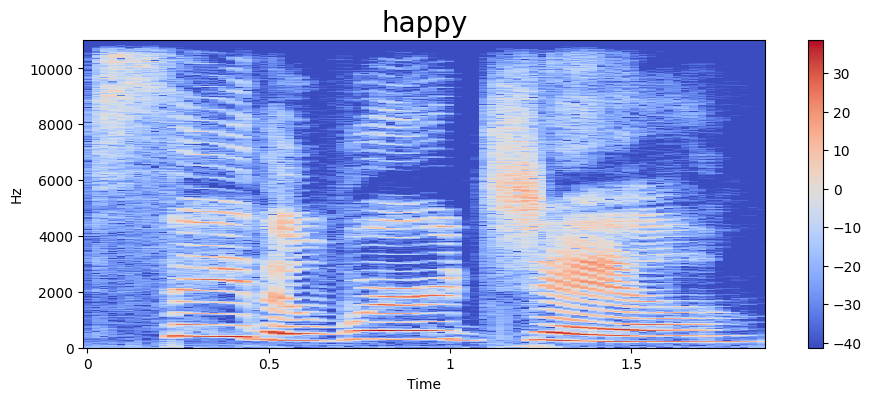

In [33]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

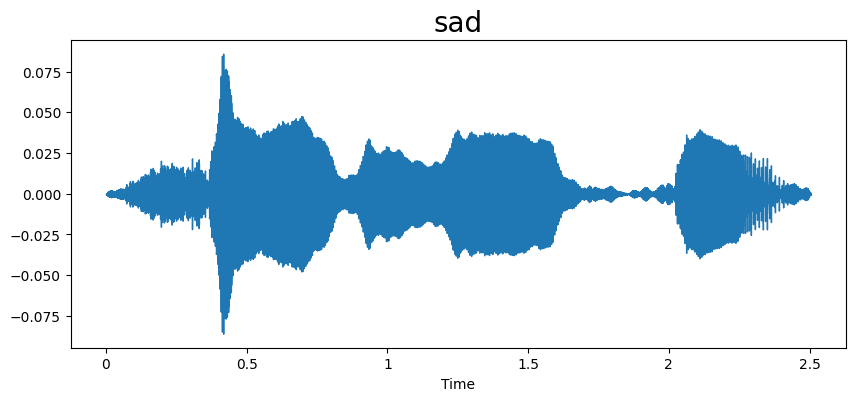

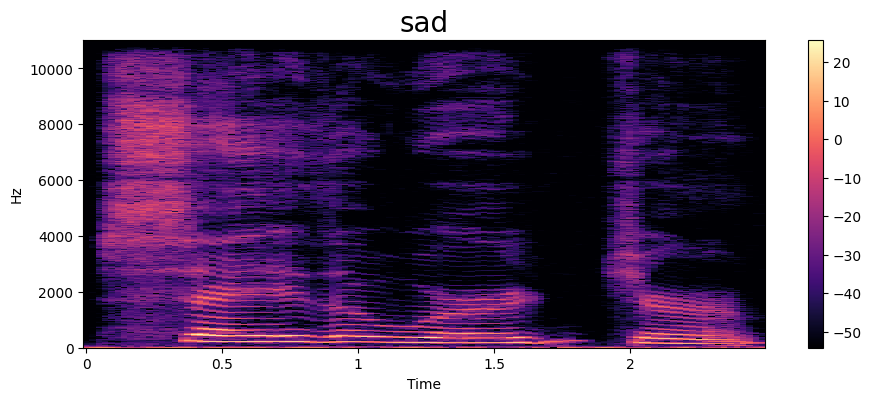

In [34]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

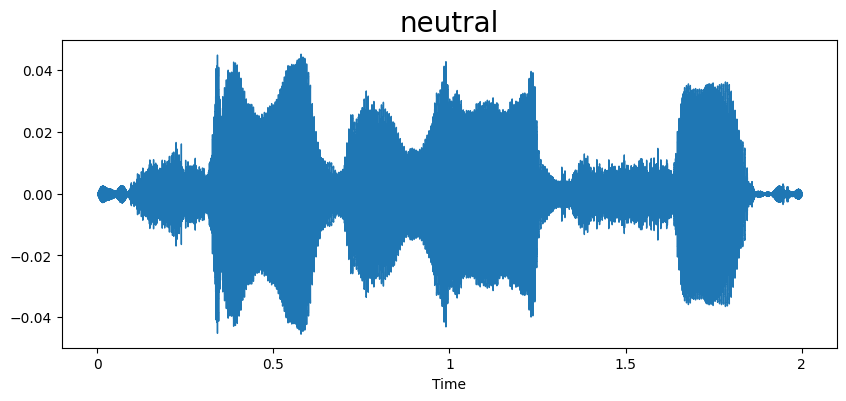

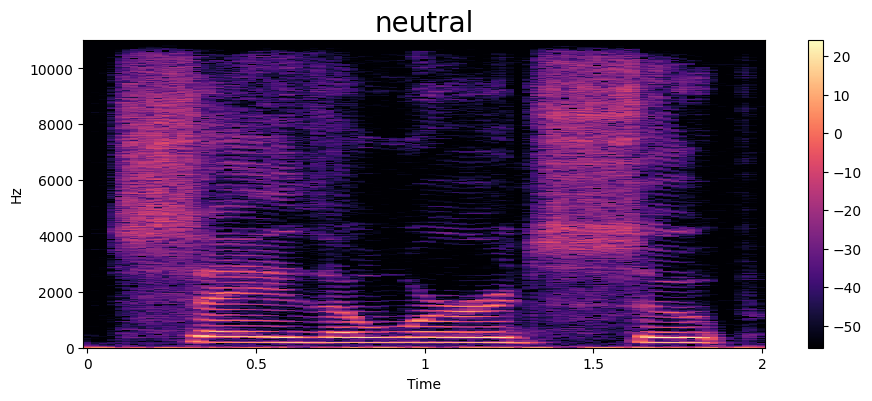

In [35]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [34]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor)

In [35]:
def zcr(data, frame_length, hop_length):
    zcr_values = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr_values)

def rmse(data, frame_length=2048, hop_length=512):
    rmse_values = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_values)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_values = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_values.T) if not flatten else np.ravel(mfcc_values.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])

    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                       ))
    return result

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    audio = extract_features(data)
    
    noised_audio = noise(data)
    aud2 = extract_features(noised_audio)
    audio = np.vstack((audio, aud2))
    
    pitched_audio = pitch(data, sr)
    aud3 = extract_features(pitched_audio)
    audio = np.vstack((audio, aud3))
    
    pitched_audio1 = pitch(data, sr)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio)
    audio = np.vstack((audio, aud4))
    
    return audio


In [36]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(df.speech,df.label,range(df.speech.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

2it [00:02,  1.09it/s]

0 audio has been processed


502it [01:27,  5.71it/s]

500 audio has been processed


1002it [03:08,  5.74it/s]

1000 audio has been processed


1502it [04:39,  5.18it/s]

1500 audio has been processed


2002it [06:04,  5.81it/s]

2000 audio has been processed


2502it [07:42,  5.59it/s]

2500 audio has been processed


3001it [09:08,  4.39it/s]

3000 audio has been processed


3501it [11:09,  3.72it/s]

3500 audio has been processed


4001it [13:25,  3.43it/s]

4000 audio has been processed


4064it [13:42,  4.94it/s]

Done
Time:  822.8310035900001


In [37]:
len(X)

16256

In [38]:
len(Y)

16256

In [39]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion_bigger.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.024414,0.037109,0.049316,0.055176,0.056641,0.058105,0.059570,0.061035,0.074707,0.088867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.050781,0.063477,0.075684,0.061035,0.059570,0.061035,0.063477,0.067871,0.079590,0.096680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.025391,0.038574,0.051270,0.056152,0.061523,0.069824,0.070312,0.065918,0.063965,0.063477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.037109,0.050293,0.062988,0.060059,0.062012,0.072754,0.074219,0.071777,0.070801,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.033203,0.054199,0.065430,0.056641,0.045410,0.038086,0.042480,0.047363,0.055176,0.053223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry


In [40]:
Emotions.tail(50)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
16206,0.060059,0.087402,0.149902,0.142578,0.177734,0.209961,0.174805,0.171875,0.167969,0.145996,...,1.999494,3.625700,8.161977,12.039639,-6.842892,-2.042761,10.535269,6.340785,-4.469835,sad
16207,0.200684,0.315918,0.444336,0.473145,0.478027,0.491699,0.484375,0.485840,0.494629,0.484863,...,0.495289,4.449698,10.328559,8.426739,-6.404306,-4.222579,5.586223,5.003689,-6.550994,sad
16208,0.458984,0.530273,0.719727,0.641113,0.598145,0.746094,0.772949,0.804199,0.812012,0.770020,...,4.299998,3.192975,-4.395642,2.961239,-0.210175,-5.343655,3.336631,3.400651,5.304661,neutral
16209,0.244141,0.370117,0.504395,0.500488,0.503906,0.497559,0.494141,0.505371,0.502930,0.513184,...,-2.008598,-0.047600,3.692446,3.705228,2.090639,7.592405,0.429657,0.448331,-1.624289,neutral
16210,0.334473,0.441895,0.556641,0.471191,0.433594,0.423828,0.401855,0.370605,0.346680,0.345703,...,-1.155389,-1.195769,0.516313,4.592873,-1.724166,-2.746615,3.169752,3.335794,5.856535,neutral
16211,0.239746,0.363770,0.488281,0.495117,0.500977,0.505859,0.512207,0.519531,0.525391,0.520020,...,4.341956,3.866230,-0.922071,-0.747008,0.143733,-4.910645,-6.901977,1.103410,7.420353,neutral
16212,0.281250,0.386230,0.518555,0.436035,0.468262,0.510742,0.553223,0.675781,0.664062,0.640625,...,2.332526,-7.204306,-3.787048,1.216644,0.132388,-5.992554,4.504711,-1.470257,-3.522044,sad
16213,0.242188,0.358887,0.476074,0.469727,0.475098,0.485352,0.487305,0.485840,0.495605,0.497559,...,5.356908,-1.461503,-4.368573,0.936472,5.835566,4.467222,1.127192,-3.756767,-2.872685,sad
16214,0.177246,0.236328,0.293457,0.220703,0.219238,0.210449,0.215820,0.252441,0.231445,0.255859,...,4.645166,-3.989491,0.247195,8.901863,0.799592,-2.804119,2.349813,-5.538867,-0.570233,sad
16215,0.207520,0.290527,0.380859,0.342773,0.361816,0.378906,0.396484,0.420898,0.422363,0.438477,...,0.361446,-2.096596,-0.129115,8.464761,5.656348,-0.997875,0.199871,-5.451960,-3.008439,sad


In [ ]:
Emotions = pd.read_csv("/kaggle/input/emotion/emotion_bigger.csv")

In [41]:
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.024414,0.037109,0.049316,0.055176,0.056641,0.058105,0.059570,0.061035,0.074707,0.088867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.050781,0.063477,0.075684,0.061035,0.059570,0.061035,0.063477,0.067871,0.079590,0.096680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.025391,0.038574,0.051270,0.056152,0.061523,0.069824,0.070312,0.065918,0.063965,0.063477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.037109,0.050293,0.062988,0.060059,0.062012,0.072754,0.074219,0.071777,0.070801,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.033203,0.054199,0.065430,0.056641,0.045410,0.038086,0.042480,0.047363,0.055176,0.053223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry


In [42]:
Emotions=Emotions.fillna(0)

In [43]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions']

In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [45]:
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13004, 2376), (13004, 4), (3252, 2376), (3252, 4))

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13004, 2376), (13004, 4), (3252, 2376), (3252, 4))

In [48]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

2024-03-03 08:49:07.665671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 08:49:07.665771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 08:49:07.873607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [50]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((13004, 2376, 1), (13004, 4), (3252, 2376, 1), (3252, 4))

In [51]:
import keras.layers as L

model = keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(4,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,05

 Total params: 7,191,684 (27.43 MB)

 Trainable params: 7,187,332 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [52]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the early stopping callback
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model1.keras', monitor='val_accuracy', save_best_only=True)

# Now you can use it in your model.fit function
history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64, callbacks=[early_stop, lr_reduction, model_checkpoint])

Epoch 1/50
  1/204 ━━━━━━━━━━━━━━━━━━━━ 1:18:14 23s/step - accuracy: 0.2812 - loss: 1.9938

I0000 00:00:1709455799.815893     228 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709455799.842407     228 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7735 - loss: 0.7118

W0000 00:00:1709455836.282645     227 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1709455840.742856     226 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


204/204 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.7738 - loss: 0.7104 - val_accuracy: 0.3281 - val_loss: 1.4462 - learning_rate: 0.0010
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 138ms/step - accuracy: 0.9128 - loss: 0.2187 - val_accuracy: 0.5274 - val_loss: 1.5653 - learning_rate: 0.0010
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.9361 - loss: 0.1643 - val_accuracy: 0.9053 - val_loss: 0.2315 - learning_rate: 0.0010
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.9480 - loss: 0.1340 - val_accuracy: 0.8905 - val_loss: 0.2846 - learning_rate: 0.0010
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.9601 - loss: 0.1033 - val_accuracy: 0.8967 - val_loss: 0.2810 - learning_rate: 0.0010
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 137ms/step - accuracy: 0.9584 - loss: 0.1043 - val_accuracy: 0.9496 - val_loss: 0.1355 - learning_rate: 0.0010
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 137ms/step - accuracy: 0.9611 - loss:

In [56]:
accuracy = model.evaluate(x_testcnn, y_test, verbose=0)[1]
print("Accuracy of our model on test data:", accuracy * 100, "%")

Accuracy of our model on test data: 99.44649338722229 %


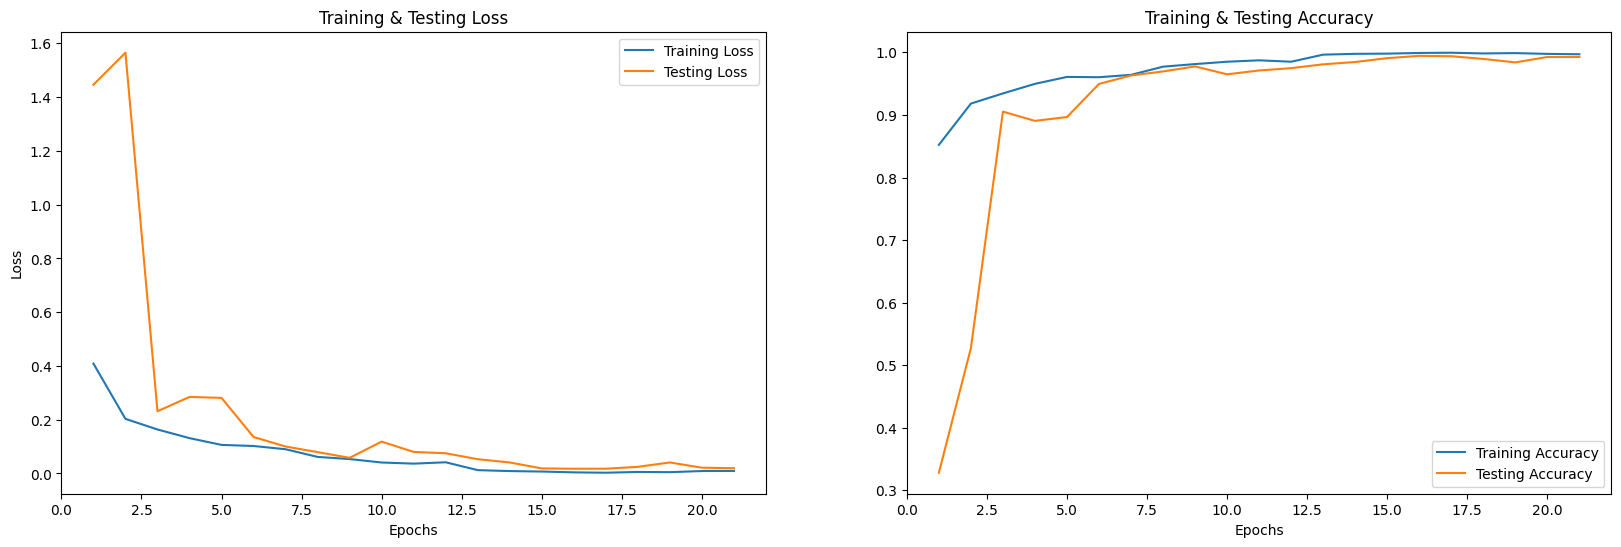

In [57]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model training
# history = model.fit(...)

# Extract training and testing loss from the history object
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create an array of epochs matching the number of training epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and testing loss
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)

ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()
# You can add similar code for accuracy or other metrics if available in the history object

plt.show()



In [58]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(100)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,sad,sad
4,happy,happy
...,...,...
95,happy,happy
96,angry,angry
97,neutral,neutral
98,neutral,neutral


In [59]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")

Done


In [60]:
from keras.models import load_model

loaded_model = load_model('/kaggle/working/best_model1.keras')

In [67]:
def get_predict_feat(path):
#     d, s_rate= librosa.load(path, duration = 2.39)
    res=extract_features(path)
    result=np.array(res)
    desired_length = 2376
    if len(result) < desired_length:
        result = np.pad(result, (0, desired_length - len(result)), 'constant')
    result=np.reshape(result,newshape=(1,2376))
#     i_result = scaler.transform(result)
    final_result=np.expand_dims(result, axis=2)
    
    return final_result

In [ ]:
res=get_predict_feat("/kaggle/input/testaudio/WhatsApp Audio 2024-03-02 at 22.10.44_7c7cda28.wav")
print(res.shape)

In [71]:

def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder.inverse_transform(predictions)
    print(y_pred[0][0]) 

def split_audio(audio_path, duration=2.5):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=22050, offset = 0.6)

    # Calculate the number of samples for the specified duration
    samples_per_interval = int(duration * sr)

    # Split the audio into intervals
    audio_intervals = [y[i:i + samples_per_interval] for i in range(0, len(y), samples_per_interval)]

    return audio_intervals

# Example usage
audio_path = "/kaggle/input/testaudio/WhatsApp Audio 2024-03-03 at 01.32.27_65ec64c4.wav"
intervals_array = split_audio(audio_path)
print(len(intervals_array))
for i in intervals_array:
    prediction(i)

6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
happy
